In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

from SEIR import SEIR

In [2]:
# loading new data
train_df = pd.read_csv('data/covid_19_clean_complete.csv')

In [3]:
# AUX FUNCTIONS AND VARIABLES
def get_country_data(df, country):
    df_loc = df[df["Country/Region"] == country].query("Confirmed > 0")
    if len(df_loc) == 0:
        df_loc = df[df["Province/State"] == country].query(
            "Confirmed > 0"
        )
    return df_loc 

t_inc = 5.2
t_inf = 2.9

# ITALY

In [51]:
# ITALY

country = "Italy"
pop = 60480000
quarantine_date = "3/9/20"

# getting italy data
data_loc = get_country_data(train_df, country)
print(f"Start date: {data_loc['Date'].iloc[0]}")
print(f"End date: {data_loc['Date'].iloc[-1]}")\
# getting number of days until quarantine was enforeced
data_loc = data_loc.reset_index()
quarentine_day = data_loc.index[data_loc['Date'] == quarantine_date][0]
print(quarentine_day)
# initializing model
model_italy = SEIR(pop, n_infected, t_inc, t_inf)
# fitting model - optimizing days after quarentine was established
model_italy.fit(
    y_inf=data_loc["Confirmed"],
    y_fat=data_loc["Deaths"],
    optim_days=len(data_loc)-quarentine_day,
    optim_field="avg",
    decay_func="hill"
)

Start date: 1/31/20
End date: 4/3/20
38


[2020-04-04 19:55:44][INFO]  Best params:
 R_n: 3.6661463226266395
 CFR: 0.13277017764468424
 k: 4.0
 L: 46.964816406387484 (SEIR.py:172)
[2020-04-04 19:55:44][INFO]  =============BEST TRAINING MSLE RESULTS============= (SEIR.py:178)
[2020-04-04 19:55:44][INFO]  Train infected MSLE: 0.00455 (SEIR.py:179)
[2020-04-04 19:55:44][INFO]  Train fatalities MSLE: 0.00802 (SEIR.py:180)
[2020-04-04 19:55:44][INFO]  Train average MSLE: 0.00629 (SEIR.py:181)


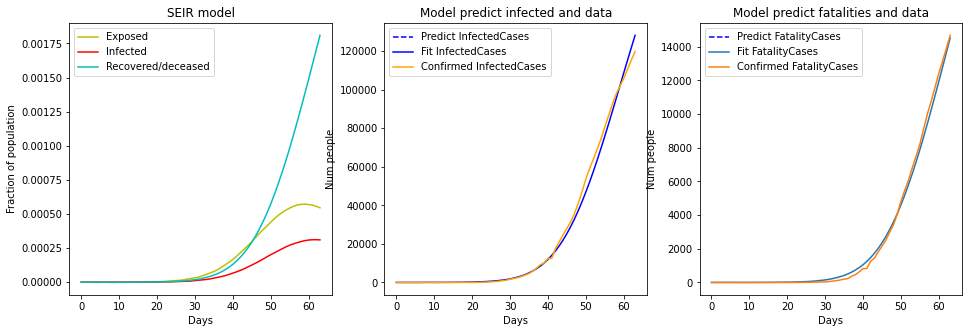

In [52]:
model_italy.plot(data_inf=data_loc["Confirmed"], data_fat=data_loc["Deaths"], num_train_days=len(data_loc))

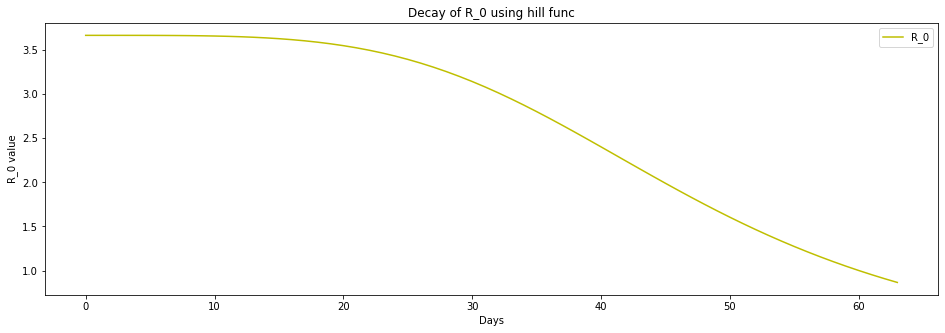

In [53]:
# plot of R_0 decay over time
model_italy.plot_decay_curve(num_days=len(data_loc))

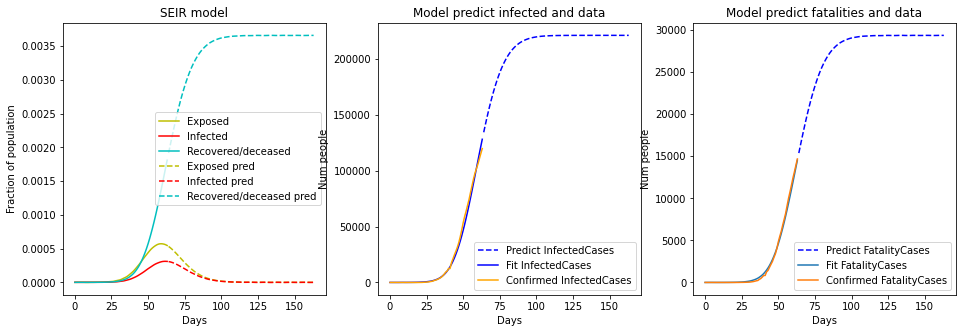

In [54]:
_, _, inf, rec = model_italy.predict(num_train_days=len(data_loc), forecast_days=100)
model_italy.plot(data_inf=data_loc["Confirmed"], data_fat=data_loc["Deaths"], num_train_days=len(data_loc))

In [55]:
preds_inf = (inf+rec)*pop
preds_fat = rec*model_italy.cfr*pop
print(f"Predicted number of infected people in April 5th: {preds_inf[0]:0.1f}")
print(f"Predicted number of fatalities in April 5th: {preds_fat[0]:0.1f}")

Predicted number of infected people in April 5th: 134431.0
Predicted number of fatalities in April 5th: 15380.5


# SPAIN

In [92]:
country = "Spain"
pop = 46660000
quarantine_date = "3/14/20"

# getting italy data
data_loc = get_country_data(train_df, country)
print(f"Start date: {data_loc['Date'].iloc[0]}")
print(f"End date: {data_loc['Date'].iloc[-1]}")\
# getting number of days until quarantine was enforeced
data_loc = data_loc.reset_index()
quarentine_day = data_loc.index[data_loc['Date'] == quarantine_date][0]
print(quarentine_day)
# initializing model
model_spain = SEIR(pop, n_infected, t_inc, t_inf)
# fitting model - optimizing days after quarentine was established
model_spain.fit(
    y_inf=data_loc["Confirmed"],
    y_fat=data_loc["Deaths"],
    optim_days=len(data_loc)-quarentine_day,
    optim_field="avg",
    decay_func="hill"
)

Start date: 2/1/20
End date: 4/3/20
42


[2020-04-04 20:11:02][INFO]  Best params:
 R_n: 3.205073941478133
 CFR: 0.11394108385661103
 k: 1.9857855802440056
 L: 99.99995372954147 (SEIR.py:172)
[2020-04-04 20:11:02][INFO]  =============BEST TRAINING MSLE RESULTS============= (SEIR.py:178)
[2020-04-04 20:11:02][INFO]  Train infected MSLE: 0.02474 (SEIR.py:179)
[2020-04-04 20:11:02][INFO]  Train fatalities MSLE: 0.04645 (SEIR.py:180)
[2020-04-04 20:11:02][INFO]  Train average MSLE: 0.03559 (SEIR.py:181)


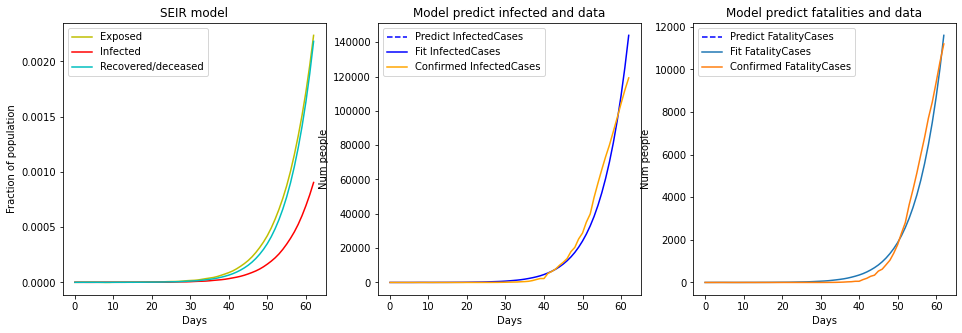

In [93]:
model_spain.plot(data_inf=data_loc["Confirmed"], data_fat=data_loc["Deaths"], num_train_days=len(data_loc))

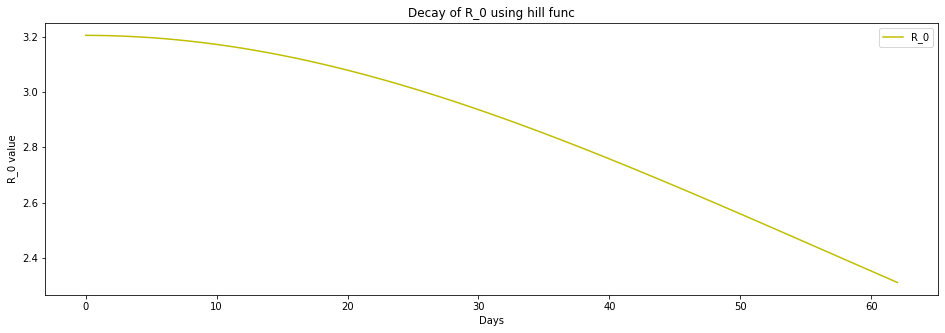

In [94]:
# plot of R_0 decay over time
model_spain.plot_decay_curve(num_days=len(data_loc))

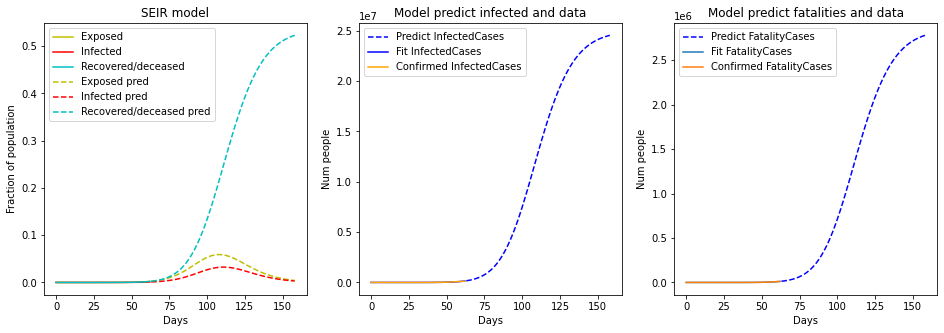

In [95]:
_, _, inf, rec = model_spain.predict(num_train_days=len(train_loc), forecast_days=100)
model_spain.plot(data_inf=data_loc["Confirmed"], data_fat=data_loc["Deaths"], num_train_days=len(data_loc))

In [96]:
print(data_loc["Date"].iloc[-1])
print(len(data_loc))


4/3/20
63


# Portugal

In [87]:
# PORTUGAL

country = "Portugal"
pop = 10290000
data_loc = get_country_data(train_df, country)
print(f"Start date: {data_loc['Date'].iloc[0]}")
print(f"End date: {data_loc['Date'].iloc[-1]}")
n_infected = data_loc["Confirmed"].iloc[0]
# getting quarantine day
data_loc = data_loc.reset_index()
quarantine_date = "3/18/20"
quarentine_day = data_loc.index[data_loc['Date'] == quarantine_date][0]

# initializing model
model_portugal = SEIR(pop, n_infected, t_inc, t_inf)

model_portugal.fit(
    y_inf=data_loc["Confirmed"],
    y_fat=data_loc["Deaths"],
    optim_days=33,#len(data_loc)-quarentine_day,#20
    optim_field="fat",
    decay_func="hill",
    bounds=((1, 5), (0, 0.15), (1, 20), (1, 100)),
)

Start date: 3/2/20
End date: 4/3/20


[2020-04-04 20:08:29][INFO]  Best params:
 R_n: 5.0
 CFR: 0.026418432926604948
 k: 20.0
 L: 25.69108752100009 (SEIR.py:172)
[2020-04-04 20:08:29][INFO]  =============BEST TRAINING MSLE RESULTS============= (SEIR.py:178)
[2020-04-04 20:08:29][INFO]  Train infected MSLE: 0.18195 (SEIR.py:179)
[2020-04-04 20:08:29][INFO]  Train fatalities MSLE: 0.06260 (SEIR.py:180)
[2020-04-04 20:08:29][INFO]  Train average MSLE: 0.12228 (SEIR.py:181)


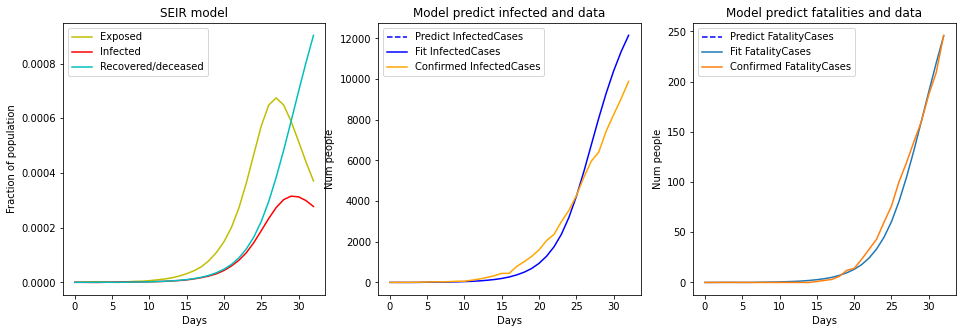

In [88]:
model_portugal.plot(data_inf=data_loc["Confirmed"], data_fat=data_loc["Deaths"], num_train_days=len(data_loc))

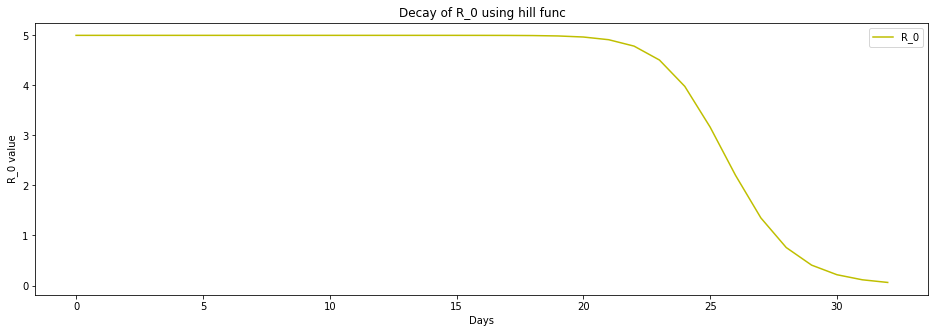

In [89]:
model_portugal.plot_decay_curve(num_days=len(data_loc))

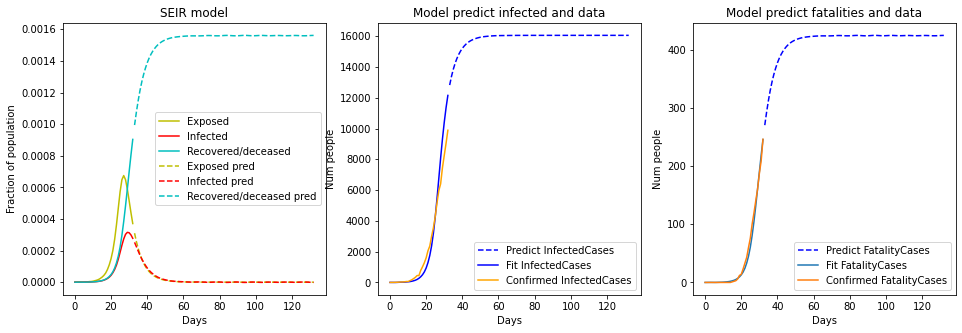

In [90]:
_, _, inf, rec = model_portugal.predict(num_train_days=len(data_loc), forecast_days=100)
model_portugal.plot(data_inf=data_loc["Confirmed"], data_fat=data_loc["Deaths"], num_train_days=len(data_loc))

In [91]:
preds_inf = (inf+rec)*pop
preds_fat = rec*model_portugal.cfr*pop
print(f"Predicted number of infected people in April 5th: {preds_inf[0]:0.1f}")
print(f"Predicted number of fatalities in April 5th: {preds_fat[0]:0.1f}")

Predicted number of infected people in April 5th: 12822.3
Predicted number of fatalities in April 5th: 270.3


In [70]:
data_loc.iloc[0]

index                10424
Province/State         NaN
Country/Region    Portugal
Lat                39.3999
Long               -8.2245
Date                3/2/20
Confirmed                2
Deaths                   0
Recovered                0
Name: 0, dtype: object